In [1]:
%matplotlib inline
%matplotlib nbagg

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.9.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

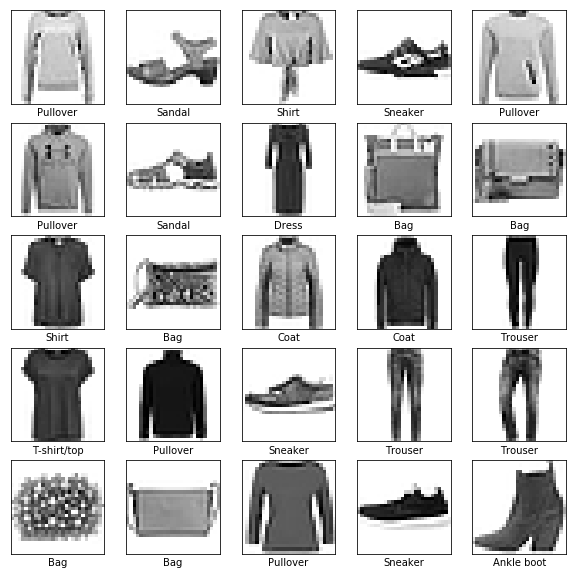

In [7]:
plt.figure(figsize=(10,10))
for i in range(400, 425):
    plt.subplot(5,5,i-400+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 131us/step - loss: 14.2435 - acc: 0.1162
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 14.5063 - acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 14.5063 - acc: 0.1000
Epoch 8/10
60000/60000 [==============================] - 4s 65us/step - loss: 14.5063 - acc: 0.1000
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 14.5063 - acc: 0.1000
Epoch 10/10
60000/60000 [==============================] - 4s 65us/step - loss: 14.5063 - 

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.1


In [12]:
predictions = model.predict(test_images)

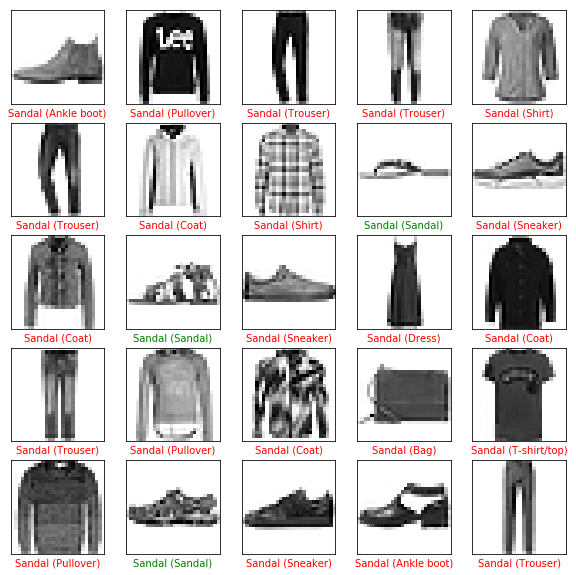

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)